# Description: 
Airfares and passengers for U.S. Domestic Routes
for 4th Quarter of 2002.

# Variables/Columns

City1   1-3

City2   5-7

Average Fare    11-17

Distance      20-23

Average weekly passengers   26-33

market leading airline    36-37

market share     40-45

Average fare    48-54

Low price airline   57-58

market share    61-66

price     69-75

# Source: 
U.S. Department of Transportation

# 1. Reading Source File and Checking Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from pycaret.regression import *
import requests


In [3]:
#reading source file
file=pd.read_csv("http://users.stat.ufl.edu/~winner/data/airq402.dat", sep='\s+'  , engine='python')

In [4]:
# Adding colunm names as mentioned in data file
file.columns = ['City1', 'City2', 'Average Flight Fare', 'Distance','Average Weekly Passengers','Market Leading Airline (MLA)',
               'Market Share MLA', 'Average MLA Fare', 'Low Price Airline (LPA)', 'Market Share LPA', 'Average LPA Fare']

In [5]:
file.head()

,City1,City2,Average Flight Fare,Distance,Average Weekly Passengers,Market Leading Airline (MLA),Market Share MLA,Average MLA Fare,Low Price Airline (LPA),Market Share LPA,Average LPA Fare
0,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
1,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
2,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
3,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
4,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69


# 2. Data Cleaning

In [6]:
# getting total number of rows and column in the dataframe
print(f" Shape of the dataframe = {file.shape}")
totalrows=file.shape[0]
print(f" Total number of rows in the dataset =  {totalrows}")

 Shape of the dataframe = (999, 11)
 Total number of rows in the dataset =  999


In [7]:
# Checking Null colunms
file_nullcols = file.isnull().sum()
file_nullcols

# No null values are found

City1                           0
City2                           0
Average Flight Fare             0
Distance                        0
Average Weekly Passengers       0
Market Leading Airline (MLA)    0
Market Share MLA                0
Average MLA Fare                0
Low Price Airline (LPA)         0
Market Share LPA                0
Average LPA Fare                0
dtype: int64

In [8]:
# Checking data type of each colunm to check if any type needs to be changed
file.dtypes

City1                            object
City2                            object
Average Flight Fare             float64
Distance                          int64
Average Weekly Passengers       float64
Market Leading Airline (MLA)     object
Market Share MLA                float64
Average MLA Fare                float64
Low Price Airline (LPA)          object
Market Share LPA                float64
Average LPA Fare                float64
dtype: object

In [9]:
# Checking basic details of the data
file.describe()

,Average Flight Fare,Distance,Average Weekly Passengers,Market Share MLA,Average MLA Fare,Market Share LPA,Average LPA Fare
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,163.424374,1057.502503,672.527107,60.118519,166.703233,34.515806,143.225285
std,55.371544,643.307320,766.863056,19.374859,62.666775,27.087067,47.241860
min,50.520000,108.000000,181.410000,17.680000,50.520000,1.060000,49.610000
25%,126.025000,554.000000,257.115000,46.510000,124.120000,13.190000,113.825000
50%,161.360000,919.000000,404.780000,59.060000,161.440000,26.120000,137.830000
75%,197.435000,1455.000000,770.265000,73.520000,203.105000,52.950000,168.540000
max,401.230000,2724.000000,8950.760000,100.000000,490.030000,100.000000,387.940000


In [10]:
# Mean of distance, Average Weekly Passengers, Market share is above median
#These prima facie seem to have outliers

# 3. EDA

## 3.1. Univariate Analysis

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

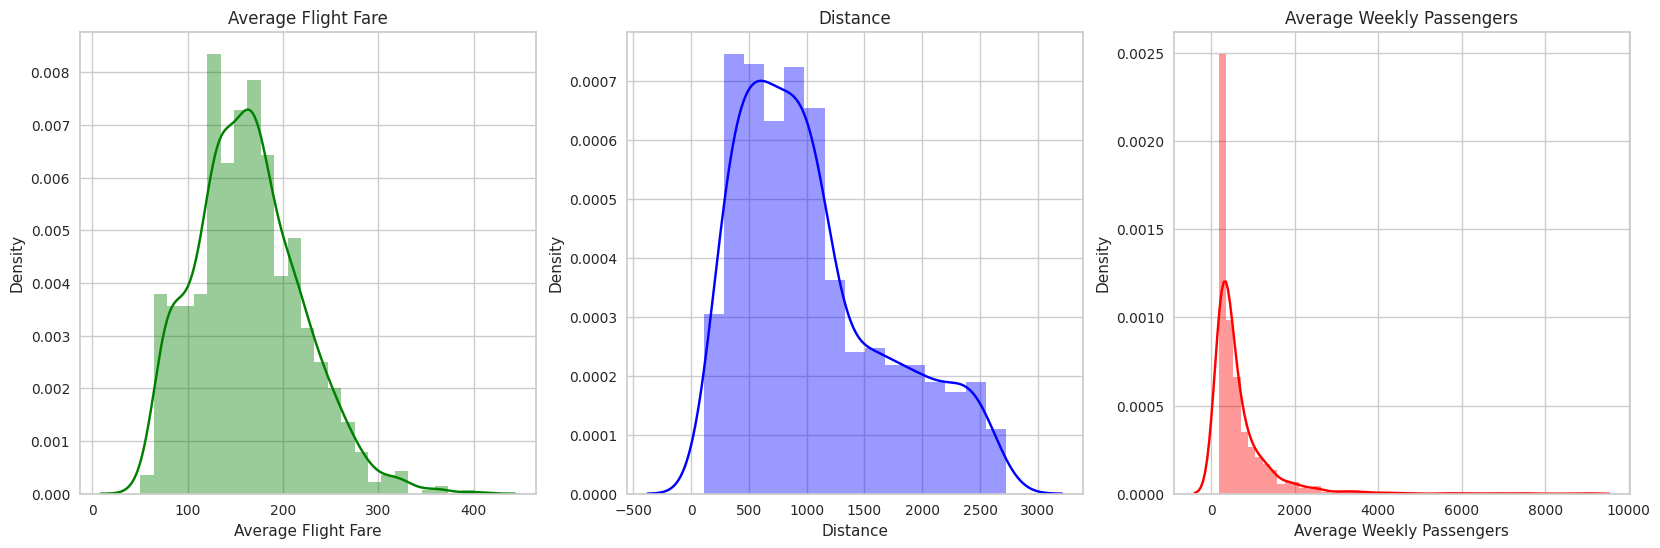

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

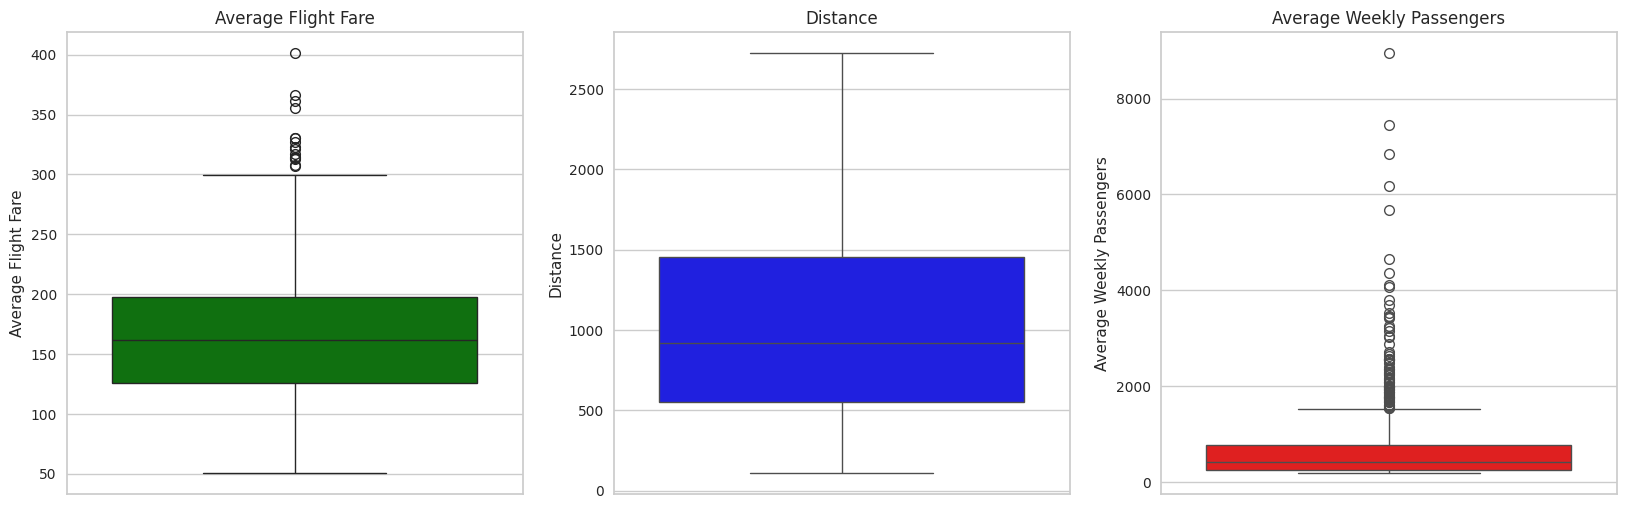

In [11]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('Average Flight Fare')
sns.distplot(file['Average Flight Fare'],color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('Distance')
sns.distplot(file['Distance'],color='blue')

# subplot 3l
plt.subplot(1, 3, 3)
plt.title('Average Weekly Passengers')
sns.distplot(file['Average Weekly Passengers'],color='red')

plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('Average Flight Fare')
sns.boxplot(file['Average Flight Fare'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('Distance')
sns.boxplot(file['Distance'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('Average Weekly Passengers')
sns.boxplot(file['Average Weekly Passengers'],orient='vertical',color='red')


plt.show()

##### Most of the flight fare lie between 100 to 300 with some outliers
##### Average distance ranges between 500 to 2500
##### Most of the time Average Weekly Passenger numer is less than 2000 but there are large number of outliers  

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

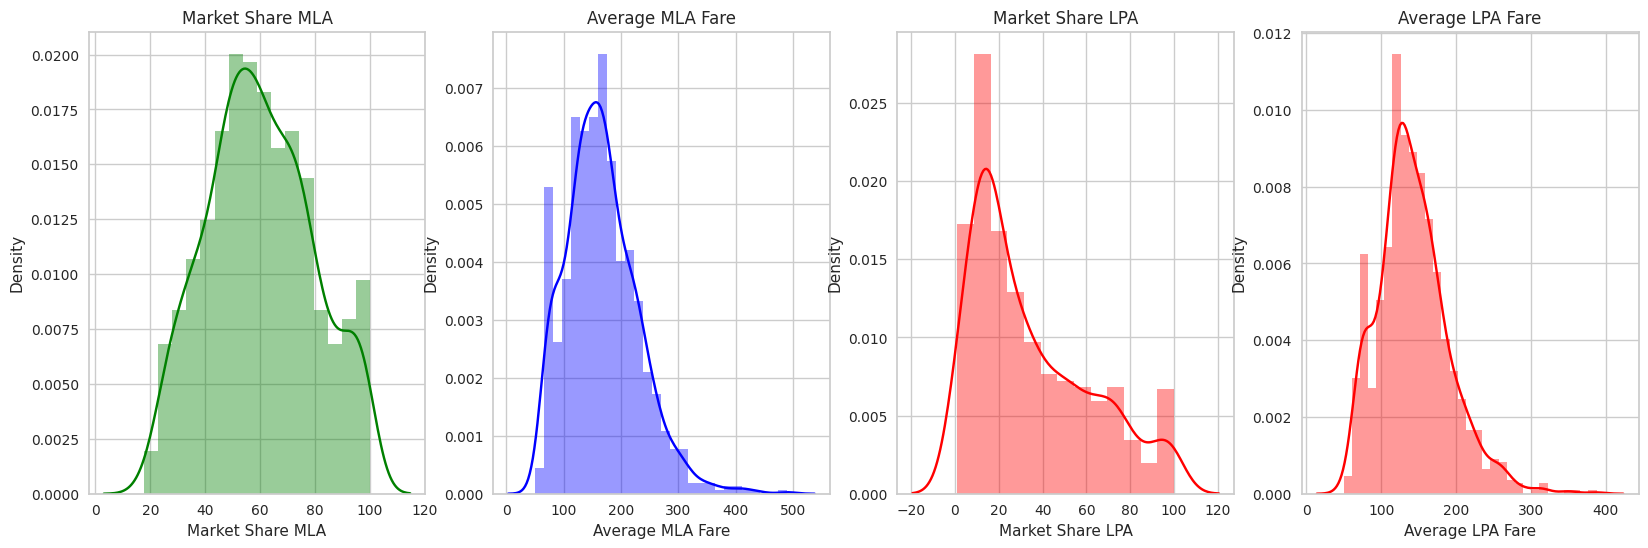

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

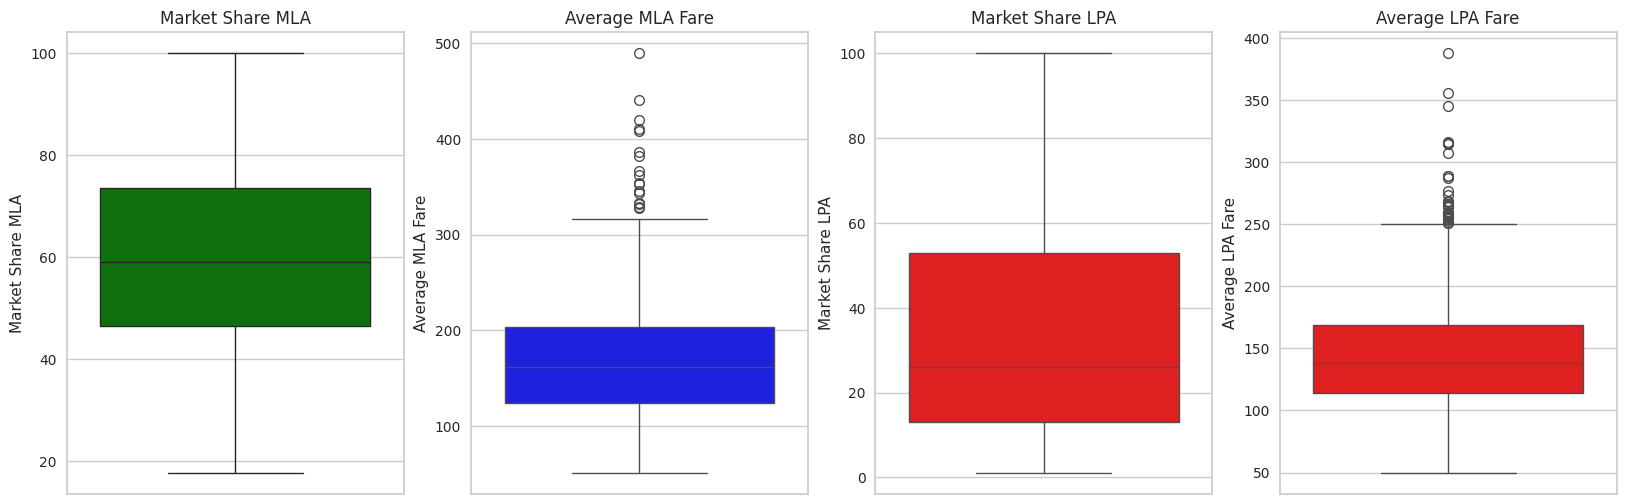

In [12]:
plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('Market Share MLA')
sns.distplot(file['Market Share MLA'],color='green')

# subplot 2
plt.subplot(1, 4, 2)
plt.title('Average MLA Fare')
sns.distplot(file['Average MLA Fare'],color='blue')

# subplot 3
plt.subplot(1, 4, 3)
plt.title('Market Share LPA')
sns.distplot(file['Market Share LPA'],color='red')

# subplot 4
plt.subplot(1, 4, 4)
plt.title('Average LPA Fare')
sns.distplot(file['Average LPA Fare'],color='red')


plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('Market Share MLA')
sns.boxplot(file['Market Share MLA'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 4, 2)
plt.title('Average MLA Fare')
sns.boxplot(file['Average MLA Fare'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 4, 3)
plt.title('Market Share LPA')
sns.boxplot(file['Market Share LPA'],orient='vertical',color='red')

# subplot 4
plt.subplot(1, 4, 4)
plt.title('Average LPA Fare')
sns.boxplot(file['Average LPA Fare'],orient='vertical',color='red')



plt.show()

##### Average fare of both Market Leader and Low Price Airline range from 100 to 300 with some outliers
##### Market Leader has 40 to 80 percent market share on most routes
##### Lower Price airline has less than 40 percent market share on most of the routes

In [13]:
##### WN followed by DL happens to be the low price airline on most routes

## 3.2. Bivariate Analysis

In [14]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.347533,0.398948,0.455743,0.072914,-0.233402,-0.731222,0.477978,-0.442621,0.015185
1,0.347533,1.000000,-0.284056,0.571003,-0.285483,0.382480,-0.362842,0.642578,0.252556,0.190047
2,0.398948,-0.284056,1.000000,-0.523649,0.152937,-0.139176,-0.092895,0.016266,-0.434016,-0.383585
3,0.455743,0.571003,-0.523649,1.000000,-0.225343,-0.227577,-0.481548,0.473286,0.279258,0.446650
4,0.072914,-0.285483,0.152937,-0.225343,1.000000,-0.104438,-0.147477,-0.523283,-0.614603,-0.189916
5,-0.233402,0.382480,-0.139176,-0.227577,-0.104438,1.000000,-0.030252,0.417640,0.205851,0.095084
6,-0.731222,-0.362842,-0.092895,-0.481548,-0.147477,-0.030252,1.000000,-0.494440,0.381407,-0.353652
7,0.477978,0.642578,0.016266,0.473286,-0.523283,0.417640,-0.494440,1.000000,0.375873,0.417863
8,-0.442621,0.252556,-0.434016,0.279258,-0.614603,0.205851,0.381407,0.375873,1.000000,0.150421
9,0.015185,0.190047,-0.383585,0.446650,-0.189916,0.095084,-0.353652,0.417863,0.150421,1.000000


#### Average Flight fare is most corelated to fare of market leader and low performing flight

<Axes: xlabel='Low Price Airline (LPA)', ylabel='Average Flight Fare'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

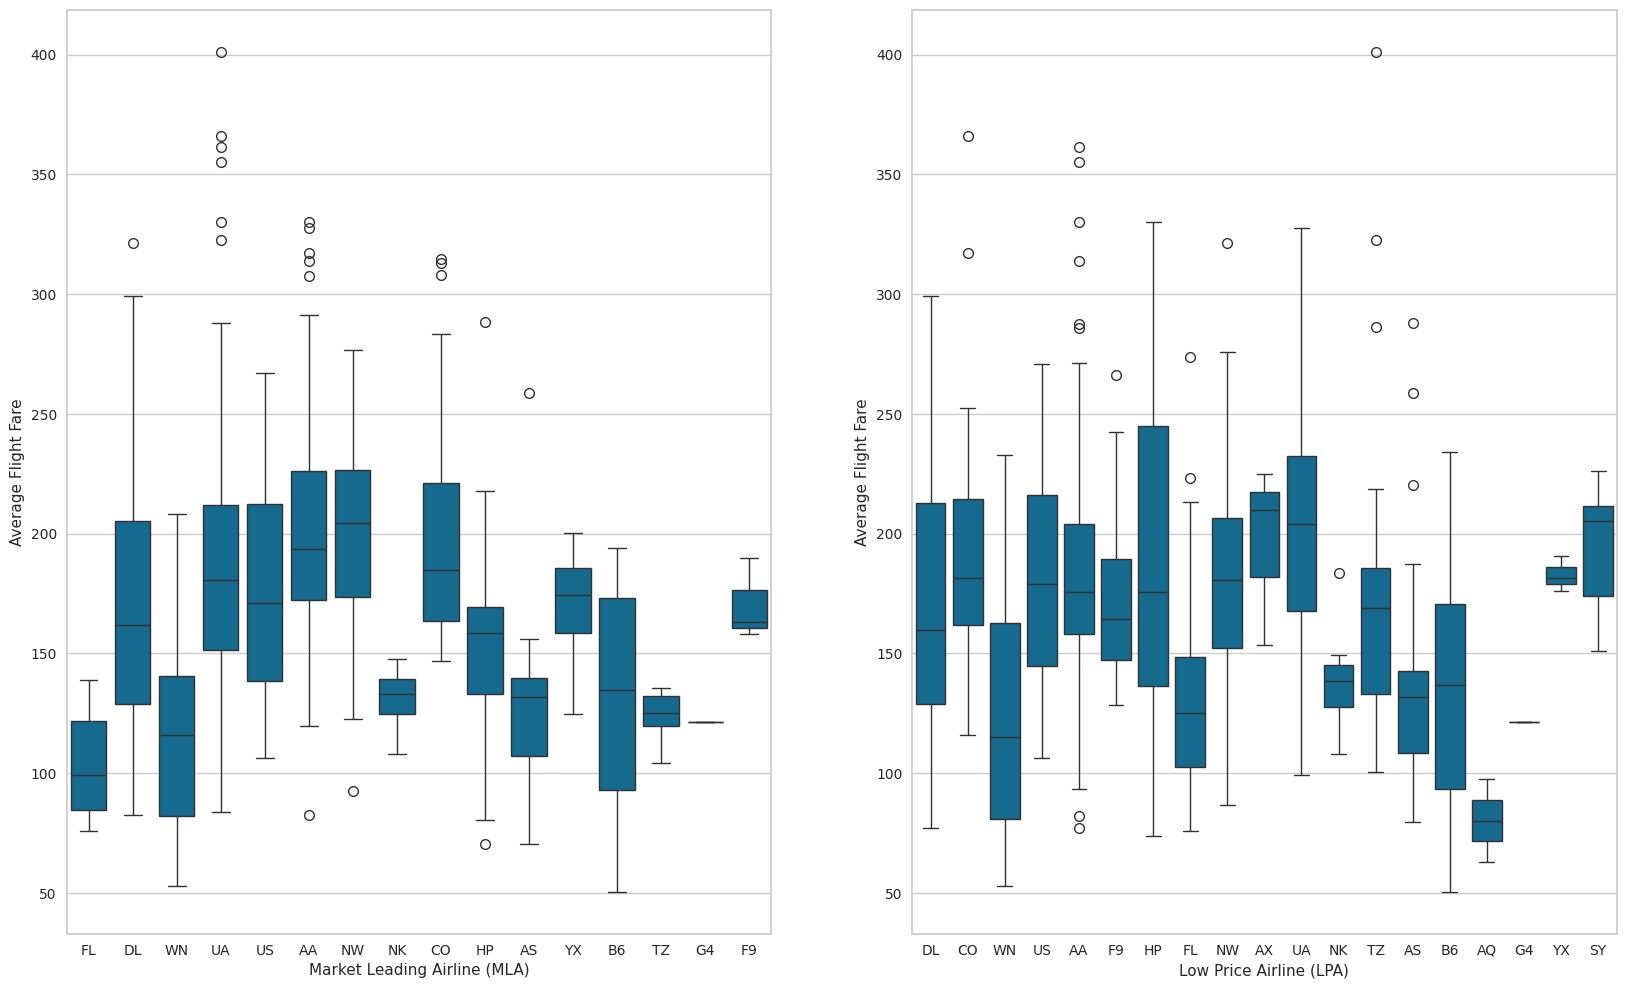

In [15]:
plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.boxplot(x = 'Market Leading Airline (MLA)', y = 'Average Flight Fare', data = file)
plt.subplot(1,2,2)
sns.boxplot(x = 'Low Price Airline (LPA)', y = 'Average Flight Fare', data = file)

##### Most flights have comparable median flight fare with some having very low values
##### Flight fare of market leading airline and Low Price airline seem to fall in similar range

# 4. Multivariate Regression and Scatter Plot

## 4.1. Scatter Plot

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

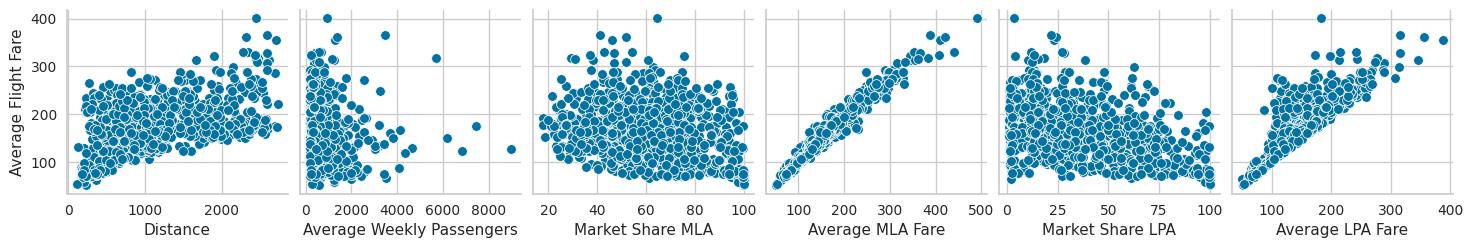

In [16]:
sns.pairplot(file, y_vars='Average Flight Fare', x_vars=["Distance", "Average Weekly Passengers",
                                                       'Market Share MLA', 'Average MLA Fare','Market Share LPA','Average LPA Fare'
                                                        ])
plt.show()

##### Average Flight fare is most corelated to fare of market leader and low performing flight with mild corelation with Distance as well

##### Variabes need to be scaled before further analysis

##### Transformation seems unnecessary as most data points don't show any clear trend with Average flight Fare.
##### Still checkking effect of log transformation on the data set

In [17]:
# Log Transformation of independent variables
D1 = np.log(file['Distance'])
D2 = np.log(file['Average Weekly Passengers'])
D3 = np.log(file['Market Share MLA'])
D4 = np.log(file['Average MLA Fare'])
D5 = np.log(file['Market Share LPA'])
D6 = np.log(file['Average LPA Fare'])

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

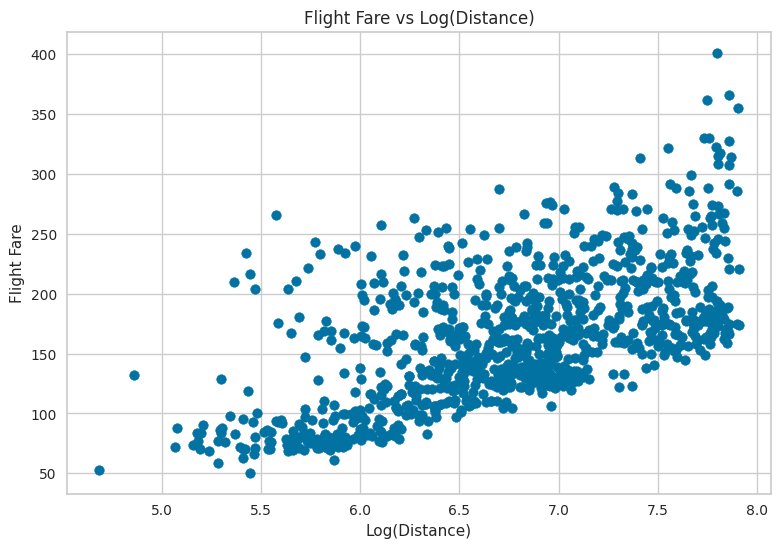

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

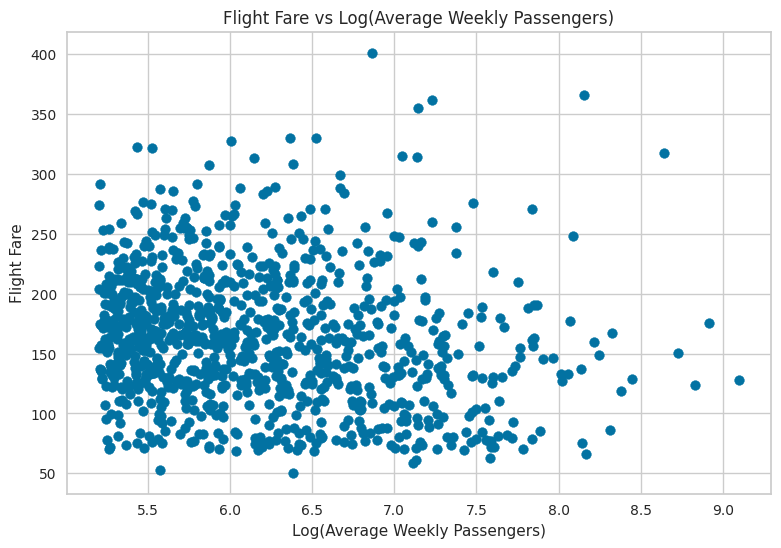

In [18]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.title('Flight Fare vs Log(Distance)')
plt.scatter( D1, file['Average Flight Fare'])
plt.xlabel('Log(Distance)')
plt.ylabel('Flight Fare')


plt.figure(figsize=(20,6))
plt.subplot(1, 2, 2)
plt.title('Flight Fare vs Log(Average Weekly Passengers)')
plt.scatter( D2, file['Average Flight Fare'])
plt.xlabel('Log(Average Weekly Passengers)')
plt.ylabel('Flight Fare')


plt.show()

#### Given Transformation does'nt seem to be adding much value, going forth with raw data only

## 4.2. Multi Linear Regression Model

In [19]:
#file.drop(['City1'], axis = 1, inplace = True)
#file.drop(['City2'], axis = 1, inplace = True)
#file.drop(['Market Leading Airline (MLA)'], axis = 1, inplace = True)
#file.drop(['Low Price Airline (LPA)'], axis = 1, inplace = True)

np.random.seed(0)
file_train, file_test = train_test_split(file, train_size = 0.7, test_size = 0.3, random_state = 100)



In [21]:
regression_setup = setup(data = file, target = 'Average LPA Fare', session_id=123)
best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,Average LPA Fare
2,Target type,Regression
3,Original data shape,"(999, 11)"
4,Transformed data shape,"(999, 43)"
5,Transformed train set shape,"(699, 43)"
6,Transformed test set shape,"(300, 43)"
7,Numeric features,6
8,Categorical features,4
9,Preprocess,True


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,08:13:26
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,9.7031,276.5396,16.3789,0.8733,0.0984,0.0641,0.1540
rf,Random Forest Regressor,9.9843,276.5308,16.3757,0.8729,0.1001,0.0671,0.1970
gbr,Gradient Boosting Regressor,10.5038,276.8352,16.3900,0.8720,0.1022,0.0715,0.1090
ada,AdaBoost Regressor,14.1101,375.6619,19.2209,0.8271,0.1312,0.1045,0.0930
ridge,Ridge Regression,14.1221,396.4895,19.7684,0.8149,0.1347,0.1033,0.0470
lr,Linear Regression,14.2116,405.5676,20.0206,0.8102,0.1387,0.1040,0.2980
lasso,Lasso Regression,14.5101,420.6833,20.3247,0.8043,0.1411,0.1076,0.0430
en,Elastic Net,14.5321,420.5057,20.3214,0.8043,0.1410,0.1078,0.0430
llar,Lasso Least Angle Regression,14.5101,420.6830,20.3247,0.8043,0.1411,0.1076,0.0460
br,Bayesian Ridge,14.5735,422.0797,20.3614,0.8035,0.1412,0.1081,0.0410


Processing:   0%|          | 0/77 [00:00<?, ?it/s]